In [2]:
import pandas as pd
import rpy2
import numpy as np
from scipy import stats as scistats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

%load_ext rpy2.ipython
%matplotlib inline


from matplotlib import rcParams
from scipy.stats import ranksums

#rcParams['figure.dpi'] = 200
#rcParams['lines.linewidth'] = 1
rcParams['axes.facecolor'] = 'white'
#rcParams['font.size'] = 10
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'Helvetica'

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [8]:
df = pd.read_csv('proteinGroups_merged.txt',sep="\t").loc[:,['Protein IDs','Majority protein IDs','LFQ intensity 1E_1','LFQ intensity 1E_2','LFQ intensity 1E_3','LFQ intensity 1Emt_1','LFQ intensity 1Emt_2','LFQ intensity 1Emt_3','LFQ intensity bead_1','LFQ intensity bead_2','LFQ intensity bead_3','Reverse','Potential contaminant']]
df = df[df['Potential contaminant']!='+']
df = df[df['Reverse']!='+']
df = df.iloc[:,[0,2,3,5,6,8,9]]
df.head()

df_LFQ = pd.DataFrame.copy(df)
df_LFQ["Protein IDs"] = df2["Protein IDs"].apply(lambda x: x.split("|")[2])
df_LFQ = df_LFQ.set_index("Protein IDs")
df_LFQ = df_LFQ
df_LFQ.head()
##no IBAQ

,LFQ intensity 1E_1,LFQ intensity 1E_2,LFQ intensity 1Emt_1,LFQ intensity 1Emt_2,LFQ intensity bead_1,LFQ intensity bead_2
Protein IDs,,,,,,
RBM47_HUMAN,0,0,0,0,0,0
IFT56_HUMAN,0,0,0,0,8551400,0
UBA6_HUMAN,98382000,0,230270000,0,370490000,0
ESYT2_HUMAN,0,487570000,0,320970000,0,647800000
MED19_HUMAN,289300000,460620000,283600000,737270000,703730000,852250000


In [9]:
df_LFQ['1E_mean'] = df_LFQ.iloc[:,[0,1]].mean(axis=1)
df_LFQ['1E_mt_mean'] = df_LFQ.iloc[:,[2,3]].mean(axis=1)

df_LFQ['bead'] = df_LFQ.iloc[:,[4,5]].mean(axis=1)
df_LFQ = df_LFQ+10000
df_LFQ.head()

,LFQ intensity 1E_1,LFQ intensity 1E_2,LFQ intensity 1Emt_1,LFQ intensity 1Emt_2,LFQ intensity bead_1,LFQ intensity bead_2,1E_mean,1E_mt_mean,bead
Protein IDs,,,,,,,,,
RBM47_HUMAN,10000,10000,10000,10000,10000,10000,10000.0,10000.0,10000.0
IFT56_HUMAN,10000,10000,10000,10000,8561400,10000,10000.0,10000.0,4285700.0
UBA6_HUMAN,98392000,10000,230280000,10000,370500000,10000,49201000.0,115145000.0,185255000.0
ESYT2_HUMAN,10000,487580000,10000,320980000,10000,647810000,243795000.0,160495000.0,323910000.0
MED19_HUMAN,289310000,460630000,283610000,737280000,703740000,852260000,374970000.0,510445000.0,778000000.0


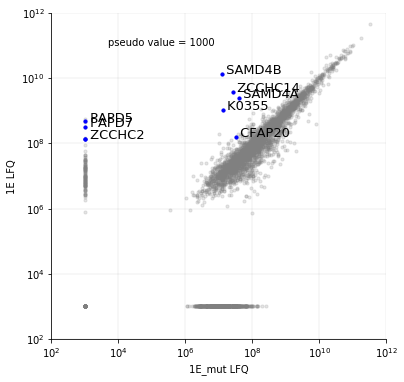

In [31]:
TUTs = ['ZCHC2', 'PAPD7', 'PAPD5', 'ZCH14', 'SMAG2', 'SMAG1', 'K0355','CFA20']
TUTs_name = ['ZCCHC2', 'PAPD7', 'PAPD5', 'ZCCHC14', 'SAMD4B', 'SAMD4A', 'K0355','CFAP20']

fig, ax = plt.subplots(1,1,figsize = (6,6))
ax.scatter(df_LFQ['1E_mt_mean'],df_LFQ['1E_mean'], s=10, color = 'grey', alpha = 0.2,label=None)
#ax.plot(df_LFQ.loc['1E_mt_mean'],df_LFQ['1E_mean'],'ok',alpha=0.2,markersize=5,linewidth=1,label=None)

ax.set(xlabel='1E_mut LFQ', ylabel='1E LFQ')
for i, s in enumerate(TUTs):
        try:
            s = "%s_HUMAN" %(s)
            ax.scatter(df_LFQ['1E_mt_mean'][s], df_LFQ['1E_mean'][s], color = 'blue', s = 10)
            ax.text(df_LFQ['1E_mt_mean'][s]+100, df_LFQ['1E_mean'][s]+100, " %s"%(TUTs_name[i]), fontsize = 13)
        except:
            print()
ax.scatter(df_LFQ['1E_mt_mean']['ZCHC2_HUMAN'], df_LFQ['1E_mean']['ZCHC2_HUMAN'], color = 'blue', s= 10,label = 'Genes of intrest')
#ax.legend(bbox_to_anchor=(0.68, 0.98), loc=2, borderaxespad=0.)
#ax.legend(loc='right', bbox_to_anchor=(1.7, 0.5), ncol=1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#adds major gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(100, 1000000000000)
ax.set_ylim(100, 1000000000000)
ax.text(5000, 10000000*10000, 'pseudo value = 1000', fontsize=10)
fig.savefig('Mass_scaterplot_ver2.pdf', format='pdf', transparent=True, bbox_inches='tight')

In [10]:
plt.rcParams["font.family"] = 'Helvetica'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['pdf.use14corefonts'] = True

savedir = '/casa/jenny/notebooks/pan-viral_MPRA/paper_figures/'

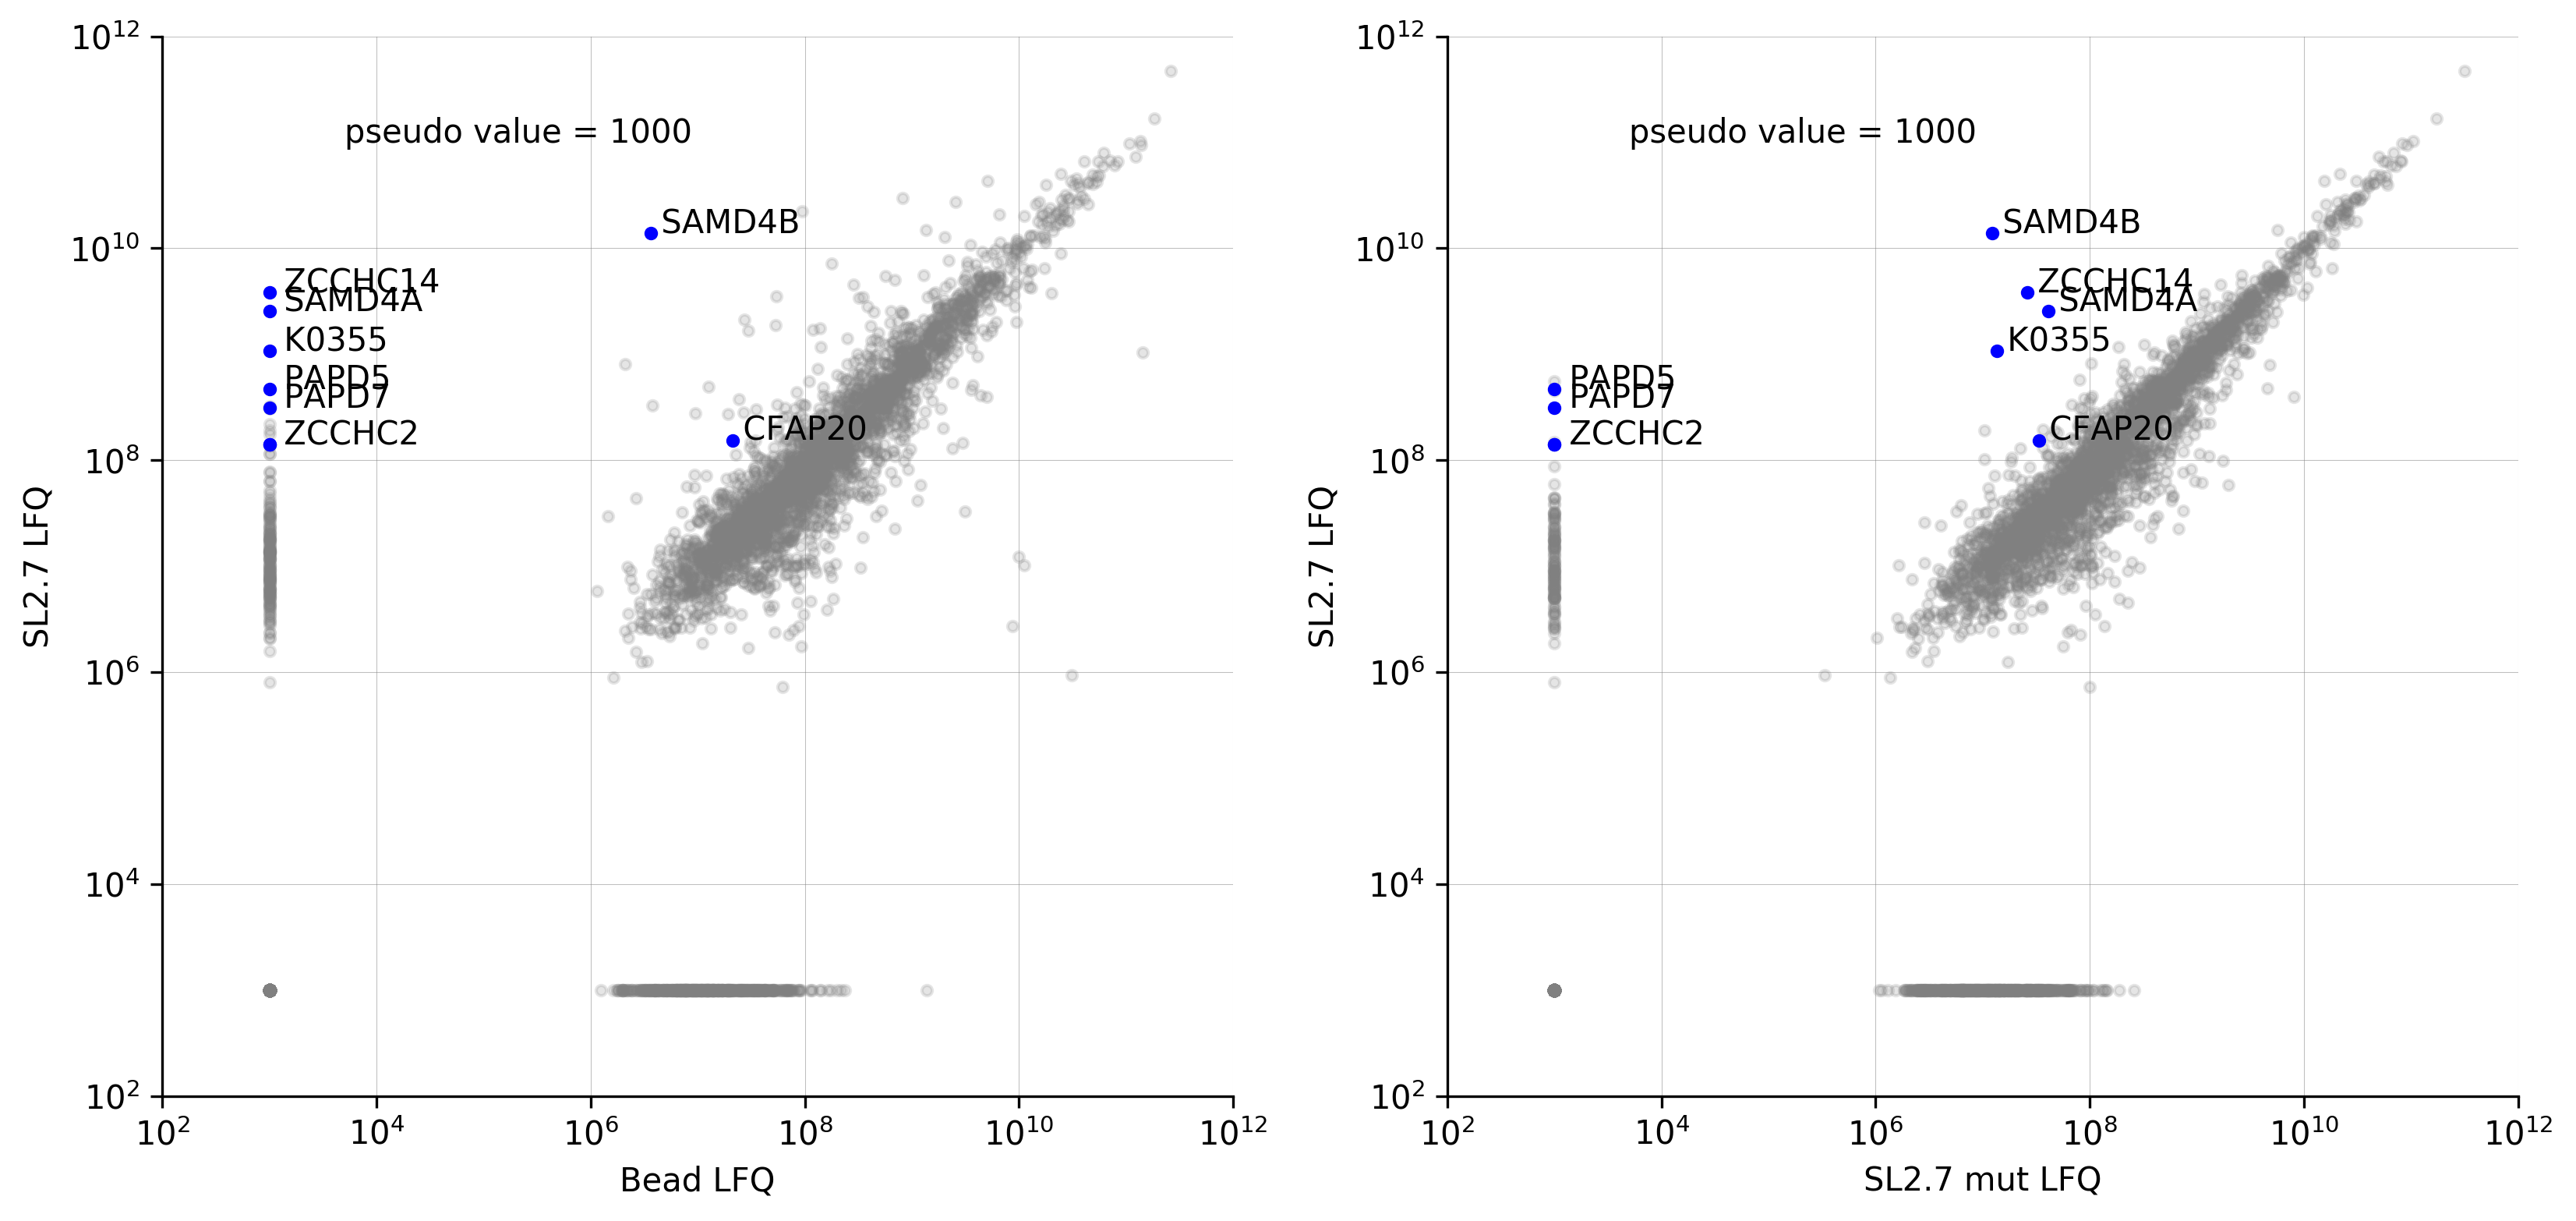

In [40]:
TUTs = ['ZCHC2', 'PAPD7', 'PAPD5', 'ZCH14', 'SMAG2', 'SMAG1', 'K0355','CFA20']
TUTs_name = ['ZCCHC2', 'PAPD7', 'PAPD5', 'ZCCHC14', 'SAMD4B', 'SAMD4A', 'K0355','CFAP20']
import seaborn as sns

fig, ax = plt.subplots(1,2,figsize = (13,6),dpi=300)
ax[0].scatter(df_LFQ['bead'],df_LFQ['1E_mean'], s=10, color = 'grey', alpha = 0.2,label=None,rasterized = True)
#ax[0].plot(df_LFQ.loc['1E_mt_mean'],df_LFQ['1E_mean'],'ok',alpha=0.2,markersize=5,linewidth=1,label=None)

ax[0].set(xlabel='Bead LFQ', ylabel='SL2.7 LFQ')
for i, s in enumerate(TUTs):
        try:
            s = "%s_HUMAN" %(s)
            ax[0].scatter(df_LFQ['bead'][s], df_LFQ['1E_mean'][s], color = 'blue', s = 10)
            ax[0].text(df_LFQ['bead'][s]+100, df_LFQ['1E_mean'][s]+100, " %s"%(TUTs_name[i]), fontsize = 10)
        except:
            print()
ax[0].scatter(df_LFQ['bead']['ZCHC2_HUMAN'], df_LFQ['1E_mean']['ZCHC2_HUMAN'], color = 'blue', s= 10,label = 'Genes of intrest')


ax[1].scatter(df_LFQ['1E_mt_mean'],df_LFQ['1E_mean'], s=10, color = 'grey', alpha = 0.2,label=None,rasterized = True)
ax[1].set(xlabel='SL2.7 mut LFQ', ylabel='SL2.7 LFQ')
for i, s in enumerate(TUTs):
        try:
            s = "%s_HUMAN" %(s)
            ax[1].scatter(df_LFQ['1E_mt_mean'][s], df_LFQ['1E_mean'][s], color = 'blue', s = 10)
            ax[1].text(df_LFQ['1E_mt_mean'][s]+100, df_LFQ['1E_mean'][s]+100, " %s"%(TUTs_name[i]), fontsize = 10)
        except:
            print()
ax[1].scatter(df_LFQ['1E_mt_mean']['ZCHC2_HUMAN'], df_LFQ['1E_mean']['ZCHC2_HUMAN'], color = 'blue', s= 10,label = 'Genes of intrest')


for i in range(2):
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    #adds major gridlines
    ax[i].grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    ax[i].set_yscale('log')
    ax[i].set_xscale('log')
    ax[i].set_xlim(100, 1000000000000)
    ax[i].set_ylim(100, 1000000000000)
    ax[i].text(5000, 10000000*10000, 'pseudo value = 1000', fontsize=10)
    #ax[i].legend(bbox_to_anchor=(0.68, 0.98), loc=2, borderax[0]espad=0.)
    #ax[i].legend(loc='right', bbox_to_anchor=(1.7, 0.5), ncol=1)
fig.savefig(savedir + 'suppFigure4(Mass)_prelim.pdf', format='pdf', transparent=True, bbox_inches='tight')

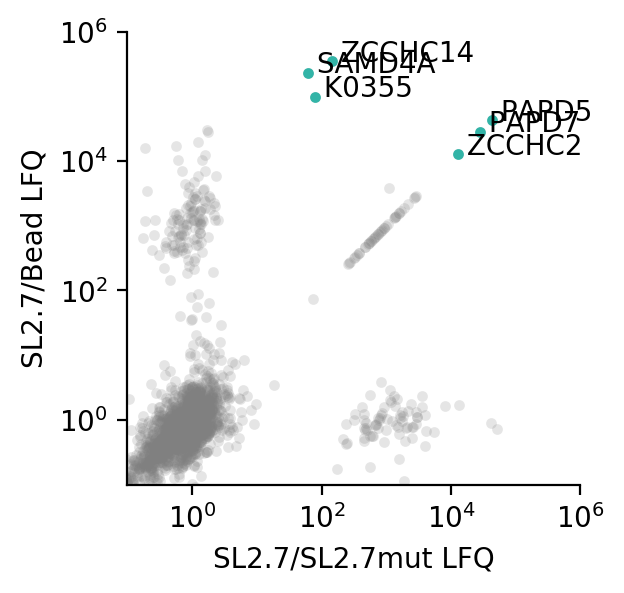

In [128]:
TUTs = ['ZCHC2', 'PAPD7', 'PAPD5', 'ZCH14', 'SMAG1', 'K0355']
TUTs_name = ['ZCCHC2', 'PAPD7', 'PAPD5', 'ZCCHC14', 'SAMD4A', 'K0355']
import seaborn as sns

fig, ax = plt.subplots(1,1,figsize = (3,3),dpi=200)
ax.scatter(df_LFQ['1E_mean']/df_LFQ['1E_mt_mean'],df_LFQ['1E_mean']/df_LFQ['bead'], linewidth=0,s=15, color = 'grey', alpha = 0.2,label=None,rasterized = True)
#ax.plot(df_LFQ.loc['1E_mt_mean'],df_LFQ['1E_mean'],'ok',alpha=0.2,markersize=5,linewidth=1,label=None)

ax.set(ylabel='SL2.7/Bead LFQ', xlabel='SL2.7/SL2.7mut LFQ')
for i, s in enumerate(TUTs):
        try:
            s = "%s_HUMAN" %(s)
            ax.scatter(df_LFQ['1E_mean'][s]/df_LFQ['1E_mt_mean'][s],df_LFQ['1E_mean'][s]/df_LFQ['bead'][s], color = '#32b4a7',linewidth =0, s = 15)
            ax.text(df_LFQ['1E_mean'][s]/df_LFQ['1E_mt_mean'][s],df_LFQ['1E_mean'][s]/df_LFQ['bead'][s], " %s"%(TUTs_name[i]), fontsize = 10)
        except:
            print()
# ax.scatter( df_LFQ['1E_mean']['ZCHC2_HUMAN']/df_LFQ['bead']['ZCHC2_HUMAN'], color = 'blue', s= 10,label = 'Genes of intrest')


# ax[1].scatter(df_LFQ['1E_mt_mean'],df_LFQ['1E_mean'], s=10, color = 'grey', alpha = 0.2,label=None,rasterized = True)
# ax[1].set(xlabel='SL2.7 mut LFQ', ylabel='SL2.7 LFQ')
# for i, s in enumerate(TUTs):
#         try:
#             s = "%s_HUMAN" %(s)
#             ax[1].scatter(df_LFQ['1E_mt_mean'][s], df_LFQ['1E_mean'][s], color = 'blue', s = 10)
#             ax[1].text(df_LFQ['1E_mt_mean'][s]+100, df_LFQ['1E_mean'][s]+100, " %s"%(TUTs_name), fontsize = 10)
#         except:
#             print()
# ax[1].scatter(df_LFQ['1E_mt_mean']['ZCHC2_HUMAN'], df_LFQ['1E_mean']['ZCHC2_HUMAN'], color = 'blue', s= 10,label = 'Genes of intrest')

# ax.vlines(1, 10**-8, 10**8,zorder=-1,linestyle = 'dashed',linewidth = 0.5)
# ax.hlines(1, 10**-8, 10**8,zorder=-1,linestyle = 'dashed',linewidth = 0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#adds major gridlines
# ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(0.1, 1000000)
ax.set_ylim(0.1, 1000000)
ax.set_aspect('equal')
plt.minorticks_off()
# ax.text(1000, 0.00001, 'pseudo value = 1000', fontsize=8)
ax.set_xticks([10**(2*x) for x in range(4)])
ax.set_yticks([10**(2*x) for x in range(4)])
# #ax.legend(bbox_to_anchor=(0.68, 0.98), loc=2, borderaxespad=0.)
# #ax.legend(loc='right', bbox_to_anchor=(1.7, 0.5), ncol=1)
fig.savefig(savedir + 'Figure_6A_ver2(Mass).pdf', format='pdf', transparent=True, bbox_inches='tight')


  (Intercept) pairinfo2 factor(c(1, 1, 0, 0))1
1           1         0                      1
2           1         1                      1
3           1         0                      0
4           1         1                      0
attr(,"assign")
[1] 0 1 2
attr(,"contrasts")
attr(,"contrasts")$pairinfo
[1] "contr.treatment"

attr(,"contrasts")$`factor(c(1, 1, 0, 0))`
[1] "contr.treatment"



(array([8.700e+01, 1.600e+01, 7.000e+00, 4.000e+00, 2.000e+00, 3.000e+00,
        2.949e+03, 7.780e+02, 1.250e+02, 3.600e+01]),
 array([1.08396706e-10, 9.98903736e-02, 1.99780747e-01, 2.99671121e-01,
        3.99561494e-01, 4.99451868e-01, 5.99342241e-01, 6.99232615e-01,
        7.99122988e-01, 8.99013362e-01, 9.98903735e-01]),
 <a list of 10 Patch objects>)

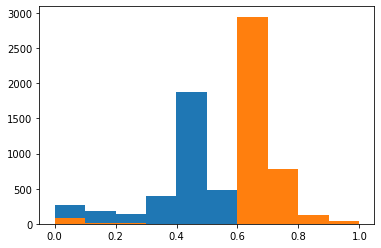

In [82]:
countsMatrix1 = df_LFQ.iloc[:,[0,1,3,4]]
countsMatrix1 = countsMatrix1[countsMatrix1.apply(lambda x: sum(x[0:2]>0)>=2, axis=1)]
# countsMatrix1 = countsMatrix1[countsMatrix1.apply(lambda x: sum(x[[0,1,2,6,7,8]]>0)>2, axis=1)]
# countsMatrix1 = countsMatrix1[countsMatrix1.apply(lambda x: sum(x[:3]>0)>2, axis=1)]
countsMatrix1 =countsMatrix1.astype(float)
countsMatrix1 = countsMatrix1.apply(lambda x: np.log10(x+1000))
annotation = countsMatrix1.index


%Rpush countsMatrix1 annotation
%R library(edgeR)
%R library(limma)
%R pairinfo = factor(rep(1:2,2))
%R design <-  model.matrix(~pairinfo+factor(c(1,1,0,0)))
%R print(design)
%R myDGEList <- DGEList(counts=countsMatrix1, group = factor(c(1,1,0,0)))
#%R myDGEList <- calcNormFactors(myDGEList)
%R voomResults <- voom(myDGEList,design)
#%R print(design)
#%R libraryInfo <- myDGEList$samples
#%R colnames(design) <- c("Intercept", "Diff")
#%R row.names(countsMatrix1) <-annotation
%R fit <- eBayes(lmFit(voomResults,design))

#Save the result
#Pull the results back to python
%R limmaResults1 <- topTable(fit, n=Inf,coef=3) 
#c("holm", "hochberg", "hommel", "bonferroni", "BH", "BY", "fdr", "none")
%R -o limmaResults1


plt.hist(limmaResults1['P.Value'])
plt.hist(limmaResults1['adj.P.Val'])

In [83]:
limmaResults1

,logFC,AveExpr,t,P.Value,adj.P.Val,B
K0355_HUMAN,1.374497,7.946683,7.639775,2.705184e-14,1.083967e-10,21.885002
PAPD5_HUMAN,1.333792,7.922839,7.042372,2.214105e-12,4.435959e-09,17.612788
ZCHC2_HUMAN,1.263275,7.871481,6.118415,1.035652e-09,1.383286e-06,11.721428
PAPD7_HUMAN,1.269242,7.893409,6.007249,2.054787e-09,2.058382e-06,11.063134
S35F2_HUMAN,1.234101,7.847799,5.712478,1.194261e-08,9.570811e-06,9.406163
...,...,...,...,...,...,...
SRS11_HUMAN,0.052085,8.682440,0.596203,5.510730e-01,7.019266e-01,-6.798764
CDC5L_HUMAN,0.048670,8.714536,0.578025,5.632794e-01,7.048825e-01,-6.845782
U2AF2_HUMAN,0.044384,8.703495,0.541880,5.879315e-01,7.124152e-01,-6.893211
PUF60_HUMAN,0.044169,8.719747,0.589368,5.556479e-01,7.042215e-01,-6.954593


  (Intercept) pairinfo2 factor(c(1, 1, 0, 0))1
1           1         0                      1
2           1         1                      1
3           1         0                      0
4           1         1                      0
attr(,"assign")
[1] 0 1 2
attr(,"contrasts")
attr(,"contrasts")$pairinfo
[1] "contr.treatment"

attr(,"contrasts")$`factor(c(1, 1, 0, 0))`
[1] "contr.treatment"



(array([ 105.,   31.,   15.,   20.,    9.,   17.,   12.,    4.,   11.,
        3783.]),
 array([2.62341666e-94, 9.99967298e-02, 1.99993460e-01, 2.99990189e-01,
        3.99986919e-01, 4.99983649e-01, 5.99980379e-01, 6.99977109e-01,
        7.99973838e-01, 8.99970568e-01, 9.99967298e-01]),
 <a list of 10 Patch objects>)

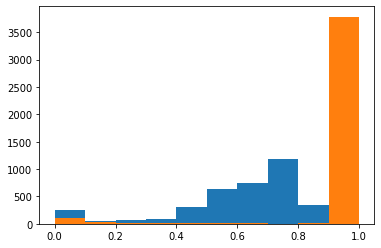

In [81]:
countsMatrix2 = df_LFQ.iloc[:,[0,1,5,6]]
countsMatrix2 = countsMatrix2[countsMatrix2.apply(lambda x: sum(x[0:2]>0)>=2, axis=1)]
# countsMatrix2 = countsMatrix2[countsMatrix2.apply(lambda x: sum(x[[0,1,2,6,7,8]]>0)>2, axis=1)]
# countsMatrix2 = countsMatrix2[countsMatrix2.apply(lambda x: sum(x[:3]>0)>2, axis=1)]
countsMatrix2 =countsMatrix2.astype(float)
countsMatrix2 = countsMatrix2.apply(lambda x: np.log10(x+1000))
annotation = countsMatrix2.index


%Rpush countsMatrix2 annotation
%R library(edgeR)
%R library(limma)
%R pairinfo = factor(rep(1:2,2))
%R design <-  model.matrix(~pairinfo+factor(c(1,1,0,0)))
%R print(design)
%R myDGEList <- DGEList(counts=countsMatrix2, group = factor(c(1,1,0,0)))
#%R myDGEList <- calcNormFactors(myDGEList)
%R voomResults <- voom(myDGEList,design)
#%R print(design)
#%R libraryInfo <- myDGEList$samples
#%R colnames(design) <- c("Intercept", "Diff")
#%R row.names(countsMatrix2) <-annotation
%R fit <- eBayes(lmFit(voomResults,design))

#Save the result
#Pull the results back to python
%R limmaResults2 <- topTable(fit, n=Inf,coef=3) 
#c("holm", "hochberg", "hommel", "bonferroni", "BH", "BY", "fdr", "none")
%R -o limmaResults2


plt.hist(limmaResults2['P.Value'])
plt.hist(limmaResults2['adj.P.Val'])

  (Intercept) pairinfo2 factor(c(2, 2, 1, 1, 0, 0))1
1           1         0                            0
2           1         1                            0
3           1         0                            1
4           1         1                            1
5           1         0                            0
6           1         1                            0
  factor(c(2, 2, 1, 1, 0, 0))2
1                            1
2                            1
3                            0
4                            0
5                            0
6                            0
attr(,"assign")
[1] 0 1 2 2
attr(,"contrasts")
attr(,"contrasts")$pairinfo
[1] "contr.treatment"

attr(,"contrasts")$`factor(c(2, 2, 1, 1, 0, 0))`
[1] "contr.treatment"



(array([6.900e+01, 7.000e+00, 1.000e+00, 6.000e+00, 4.000e+00, 4.000e+00,
        6.000e+00, 1.100e+01, 2.424e+03, 1.475e+03]),
 array([3.18388567e-14, 9.99421573e-02, 1.99884315e-01, 2.99826472e-01,
        3.99768629e-01, 4.99710787e-01, 5.99652944e-01, 6.99595101e-01,
        7.99537259e-01, 8.99479416e-01, 9.99421573e-01]),
 <a list of 10 Patch objects>)

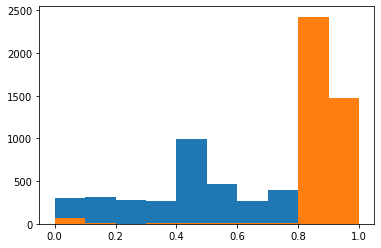

In [98]:
countsMatrix = df_LFQ.iloc[:,[0,1,3,4,6,7]]
countsMatrix = countsMatrix[countsMatrix.apply(lambda x: sum(x[0:2]>0)>=2, axis=1)]
# countsMatrix = countsMatrix[countsMatrix.apply(lambda x: sum(x[[0,1,2,6,7,8]]>0)>2, axis=1)]
# countsMatrix = countsMatrix[countsMatrix.apply(lambda x: sum(x[:3]>0)>2, axis=1)]
countsMatrix =countsMatrix.astype(float)
countsMatrix = countsMatrix.apply(lambda x: np.log10(x+1000))
annotation = countsMatrix.index


%Rpush countsMatrix annotation
%R library(edgeR)
%R library(limma)
%R pairinfo = factor(rep(1:2,3))
%R design <-  model.matrix(~pairinfo+factor(c(2,2,1,1,0,0)))
%R print(design)
%R myDGEList <- DGEList(counts=countsMatrix, group = factor(c(2,2,1,1,0,0)))
#%R myDGEList <- calcNormFactors(myDGEList)
%R voomResults <- voom(myDGEList,design)
#%R print(design)
#%R libraryInfo <- myDGEList$samples
#%R colnames(design) <- c("Intercept", "Diff")
#%R row.names(countsMatrix) <-annotation
%R fit <- eBayes(lmFit(voomResults,design))

#Save the result
#Pull the results back to python
%R limmaResults <- topTable(fit, n=Inf,coef=4) 
#c("holm", "hochberg", "hommel", "bonferroni", "BH", "BY", "fdr", "none")
%R -o limmaResults


plt.hist(limmaResults['P.Value'])
plt.hist(limmaResults['adj.P.Val'])

                logFC   AveExpr         t       P.Value     adj.P.Val  \
K0355_HUMAN  1.333511  7.718275  8.620525  7.945809e-18  3.183886e-14   
SMAG2_HUMAN  0.702280  8.410644  2.754703  5.887807e-03  3.019092e-01   
PAPD7_HUMAN  1.226388  7.682760  6.704816  2.153287e-11  1.078527e-08   
PAPD5_HUMAN  1.287685  7.702380  7.840078  5.082096e-15  7.594427e-12   
ZCH14_HUMAN  1.358630  7.935232  7.202607  6.442839e-13  4.302743e-10   
ZCHC2_HUMAN  1.205748  7.668141  6.422610  1.415936e-10  6.304060e-08   
SMAG1_HUMAN  1.252414  7.907469  5.810095  6.482510e-09  2.191530e-06   
CFA20_HUMAN  0.227889  8.416606  0.992774  3.208499e-01  8.860754e-01   

                     B  
K0355_HUMAN  29.822099  
SMAG2_HUMAN  -2.435751  
PAPD7_HUMAN  15.443532  
PAPD5_HUMAN  23.517096  
ZCH14_HUMAN  18.774333  
ZCHC2_HUMAN  13.641389  
SMAG1_HUMAN   9.981410  
CFA20_HUMAN  -5.633300  


,logFC,AveExpr,t,P.Value,adj.P.Val,B
K0355_HUMAN,1.333511,7.718275,8.620525,7.945809e-18,3.183886e-14,29.822099
PAPD5_HUMAN,1.287685,7.702380,7.840078,5.082096e-15,7.594427e-12,23.517096
LN28B_HUMAN,1.293256,8.138962,7.825861,5.685870e-15,7.594427e-12,23.405097
ZN512_HUMAN,1.253278,8.075151,7.345450,2.252202e-13,1.804915e-10,19.841843
ZCH14_HUMAN,1.358630,7.935232,7.202607,6.442839e-13,4.302743e-10,18.774333
PAPD7_HUMAN,1.226388,7.682760,6.704816,2.153287e-11,1.078527e-08,15.443532
ZCHC2_HUMAN,1.205748,7.668141,6.422610,1.415936e-10,6.304060e-08,13.641389
SMAG1_HUMAN,1.252414,7.907469,5.810095,6.482510e-09,2.191530e-06,9.981410
COMT_HUMAN,1.176712,8.028465,5.794541,7.110029e-09,2.191530e-06,9.916961
VPS25_HUMAN,1.146942,8.003815,5.099429,3.484818e-07,6.981834e-05,6.266476


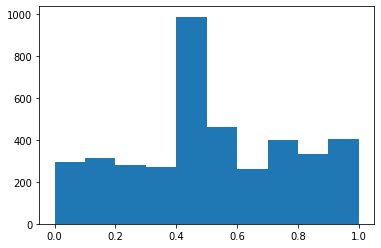

In [99]:
print(limmaResults.loc[['K0355_HUMAN', 'SMAG2_HUMAN', 'PAPD7_HUMAN','PAPD5_HUMAN', 'ZCH14_HUMAN',
       'ZCHC2_HUMAN', 'SMAG1_HUMAN', 'CFA20_HUMAN'],:])
plt.hist(limmaResults['P.Value'])
limmaResults[limmaResults['logFC']>1].sort_values('adj.P.Val').head(n=50)

In [117]:
temp1 = limmaResults1[limmaResults1['logFC']>0.8].index

limmaResults2[limmaResults2.index.isin(temp1)][limmaResults2['logFC']>0.8]

/casa/jenny/software/jupyter-py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,logFC,AveExpr,t,P.Value,adj.P.Val,B
PAPD5_HUMAN,1.308093,7.934029,4.107587,0.000041,0.004539,1.756646
ZCHC2_HUMAN,1.242790,7.882671,3.264599,0.001105,0.055367,-1.050278
PAPD7_HUMAN,1.253515,7.904599,3.211598,0.001330,0.065815,-1.208938
ZCH14_HUMAN,1.012496,8.259213,1.532092,0.125579,0.950771,-4.351840
K0355_HUMAN,0.870378,8.231105,1.131035,0.258108,0.950771,-4.642734
SMAG1_HUMAN,0.829601,8.244777,1.118431,0.263450,0.950771,-4.659771
